# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to **import** any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks.

9. The dataset is given as .npz file, and will contain data in  numpy array. 

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. You are allowed to use the numpy library to calculate eigen values. All other functions should be written from scratch.

## Change the name of the file you submit with your rollNo_Name.ipynb 
### Eg. CS20B001_FullName.ipynb




In [1]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import matplotlib as mpl
import pandas as pd

Create Directory `../../Data/` and save data files in it.

In [2]:
## MAKE YOUR DIRECTORY STRUCTURE TO CONTAIN DATA FOLDER IN THE FOLLOWING WAY.


dataA = np.load("../../Data/data1.npz")
dataB = np.load("../../Data/data2.npz")

print (dataA.files)
print (dataB.files)

## Training data = arr1, arr2 
## Test data = arr3, arr4


['arr1', 'arr2', 'arr3', 'arr4']
['arr1', 'arr2', 'arr3', 'arr4']


# SVM

Write code for learning SVM below. Also write code for choosing **best hyperparameters** for **each kernel** type. You may use `sklearn.svm` for this purpose. _(use a part of training set as validation set)_

Write code for running in the cell after. 

In `text cell` after that report the following numbers you get by running appropriate code:

For each classification data set report the best kernel and regularisation parameters for 
* Linear, 
* RBF and 
* Poly kernels.   
Note: Linear has no kernel parameter.   

Report the training and test zero-one error for those hyperparameters.

For the synthetic classification datasets in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.

In [3]:
# CodeWrite cell
# Write SVM classifier using SKlearn
# write only functions here

from sklearn.model_selection import GridSearchCV, train_test_split

def SVM_func(X_train, Y_train, kernel, C, degree = 3, gamma = 'scale'):
    
    if kernel == 'linear':
        classifier = svm.SVC(kernel = 'linear', C = C, random_state = 0)
        classifier.fit(X_train, Y_train)
        
    elif kernel == 'poly':
        classifier = svm.SVC(kernel = 'poly', C = C, degree = degree, gamma = gamma, random_state = 0)
        classifier.fit(X_train, Y_train)
        
    elif kernel == 'rbf':
        classifier = svm.SVC(kernel = 'rbf', C = C, gamma = gamma, random_state = 0)
        classifier.fit(X_train, Y_train)
        
    else:
        return "Invalid Kernel"
    
    return classifier

def hyperparam_tune(X_train, Y_train, kernel):
    
    if kernel == 'linear':
        param_grid = {'C': [10**i for i in range(-4, 3)]}
        classifier = GridSearchCV(svm.SVC(kernel = kernel, random_state = 0), param_grid, scoring = 'accuracy')
        classifier.fit(X_train, Y_train)
        return classifier
    
    elif kernel == 'rbf':
        param_grid = {'C': [10**i for i in range(-3, 2)],
                     'gamma' : [10**i for i in range(-3, 2)]}
        classifier = GridSearchCV(svm.SVC(kernel = kernel, random_state = 0), param_grid, scoring = 'accuracy')
        classifier.fit(X_train, Y_train)
        return classifier
    
    elif kernel == 'poly':
        param_grid = {'C': [10**i for i in range(-3, 2)],
                     'degree' : [i for i in range(1, 5)],
                     'gamma' : [10**i for i in range(-3, 2)]}
        classifier = GridSearchCV(svm.SVC(kernel = kernel, random_state = 0), param_grid, scoring = 'accuracy')
        classifier.fit(X_train, Y_train)    
        return classifier
    
    else:
        return "Invalid Kernel"

In [4]:
X_trainA = dataA['arr1']
Y_trainA = dataA['arr2']
X_testA = dataA['arr3']
Y_testA = dataA['arr4']
X_trainB = dataB['arr1']
Y_trainB = dataB['arr2']
X_testB = dataB['arr3']
Y_testB = dataB['arr4']

from sklearn.preprocessing import MinMaxScaler
scalerA = MinMaxScaler()
X_trainA = scalerA.fit_transform(X_trainA)
X_testA = scalerA.transform(X_testA)

scalerB = MinMaxScaler()
X_trainB = scalerB.fit_transform(X_trainB)
X_testB = scalerB.transform(X_testB)
# Best Hyperparameters for Linear Kernel
linear_classifierA = hyperparam_tune(X_trainA, Y_trainA, 'linear')
print('Best Linear Parameters for Data A')
print(linear_classifierA.best_params_)

# Best Hyperparameters for RBF Kernel
rbf_classifierA = hyperparam_tune(X_trainA, Y_trainA, 'rbf')
print('Best RBF Parameters for Data A')
print(rbf_classifierA.best_params_)

# Best Hyperparameters for Poly Kernel
poly_classifierA = hyperparam_tune(X_trainA, Y_trainA, 'poly')
print('Best Poly Parameters for Data A')
print(poly_classifierA.best_params_)

# Best Hyperparameters for Linear Kernel
linear_classifierB = hyperparam_tune(X_trainB, Y_trainB, 'linear')
print('Best Linear Parameters for Data B')
print(linear_classifierB.best_params_)

# Best Hyperparameters for RBF Kernel
rbf_classifierB = hyperparam_tune(X_trainB, Y_trainB, 'rbf')
print('Best RBF Parameters for Data B')
print(rbf_classifierB.best_params_)

# Best Hyperparameters for Poly Kernel
poly_classifierB = hyperparam_tune(X_trainB, Y_trainB, 'poly')
print('Best Poly Parameters for Data B')
print(poly_classifierB.best_params_)

Best Linear Parameters for Data A
{'C': 10}
Best RBF Parameters for Data A
{'C': 1, 'gamma': 0.01}
Best Poly Parameters for Data A
{'C': 1, 'degree': 1, 'gamma': 10}
Best Linear Parameters for Data B
{'C': 10}
Best RBF Parameters for Data B
{'C': 10, 'gamma': 10}
Best Poly Parameters for Data B
{'C': 10, 'degree': 3, 'gamma': 10}


In [5]:
# CodeWrite cell
# Write code here for doing validation (for kernel_param and regularisation_param)
# on a subset of the training set. 
# Also for generating the numbers that you report below.

# Validation and test for Linear Classifier for A

lin_classifierA = SVM_func(X_trainA, Y_trainA, 'linear', 10)
Y_train_pred_linA = lin_classifierA.predict(X_trainA)
print(f'Train error is {1-np.sum(Y_train_pred_linA==Y_trainA)/(len(Y_trainA))}')
Y_test_pred_linA = lin_classifierA.predict(X_testA)
print(f'Test error is {1-np.sum(Y_test_pred_linA==Y_testA)/(len(Y_testA))}')

# Validation and test for rbf Classifier for A

rbf_classifierA = SVM_func(X_trainA, Y_trainA, 'rbf', 1, gamma = 0.01)
Y_train_pred_rbfA = rbf_classifierA.predict(X_trainA)
print(f'Train error is {1-np.sum(Y_train_pred_rbfA==Y_trainA)/(len(Y_trainA))}')
Y_test_pred_rbfA = rbf_classifierA.predict(X_testA)
print(f'Test error is {1-np.sum(Y_test_pred_rbfA==Y_testA)/(len(Y_testA))}')

# Validation and test for poly Classifier for A

poly_classifierA = SVM_func(X_trainA, Y_trainA, 'poly', 1, degree = 1, gamma = 10)
Y_train_pred_polyA = poly_classifierA.predict(X_trainA)
print(f'Train error is {1-np.sum(Y_train_pred_polyA==Y_trainA)/(len(Y_trainA))}')
Y_test_pred_polyA = poly_classifierA.predict(X_testA)
print(f'Test error is {1-np.sum(Y_test_pred_polyA==Y_testA)/(len(Y_testA))}')

# Validation and test for Linear Classifier for B

lin_classifierB = SVM_func(X_trainB, Y_trainB, 'linear', 10)
Y_train_pred_linB = lin_classifierB.predict(X_trainB)
print(f'Train error is {1-np.sum(Y_train_pred_linB==Y_trainB)/(len(Y_trainB))}')
Y_test_pred_linB = lin_classifierB.predict(X_testB)
print(f'Test error is {1-np.sum(Y_test_pred_linB==Y_testB)/(len(Y_testB))}')

# Validation and test for rbf Classifier for B

rbf_classifierB = SVM_func(X_trainB, Y_trainB, 'rbf', 10, gamma = 10)
Y_train_pred_rbfB = rbf_classifierB.predict(X_trainB)
print(f'Train error is {1-np.sum(Y_train_pred_rbfB==Y_trainB)/(len(Y_trainB))}')
Y_test_pred_rbfB = rbf_classifierB.predict(X_testB)
print(f'Test error is {1-np.sum(Y_test_pred_rbfB==Y_testB)/(len(Y_testB))}')

# Validation and test for poly Classifier for B

poly_classifierB = SVM_func(X_trainB, Y_trainB, 'poly', 10, degree = 3, gamma = 10)
Y_train_pred_polyB = poly_classifierB.predict(X_trainB)
print(f'Train error is {1-np.sum(Y_train_pred_polyB==Y_trainB)/(len(Y_trainB))}')
Y_test_pred_polyB = poly_classifierB.predict(X_testB)
print(f'Test error is {1-np.sum(Y_test_pred_polyB==Y_testB)/(len(Y_testB))}')

Train error is 0.17666666666666664
Test error is 0.20999999999999996
Train error is 0.17200000000000004
Test error is 0.18000000000000005
Train error is 0.17666666666666664
Test error is 0.20999999999999996
Train error is 0.1293333333333333
Test error is 0.132
Train error is 0.0
Test error is 0.0020000000000000018
Train error is 0.04266666666666663
Test error is 0.05600000000000005


TextWrite Cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error for all three kernel choices, for all datasets. 

| Dataset | Kernel | Optimal Hyperparameters        | Train Error | Test Error |
|---------|--------|--------------------------------|-------------|------------|
| A       | Linear | C = 10                         | 0.176       | 0.21       |
| A       | RBF    | C = 1, gamma = 0.01            | 0.172       | 0.18       |
| A       | Poly   | C = 1, degree = 1, gamma = 10  | 0.176       | 0.21       |
| B       | Linear | C = 10                         | 0.129       | 0.132      |
| B       | RBF    | C = 10, gamma = 10             | 0           | 0.002      |
| B       | Poly   | C = 10, degree = 3, gamma = 10 | 0.043       | 0.056      |
| C       | Linear | C = 100                        | 0.073       | 0.103      |
| C       | RBF    | C = 10, gamma = 0.1            | 0.124       | 0.157      |
| C       | Poly   | C = 1, degree = 2, gamma = 10  | 0.047       | 0.085      |

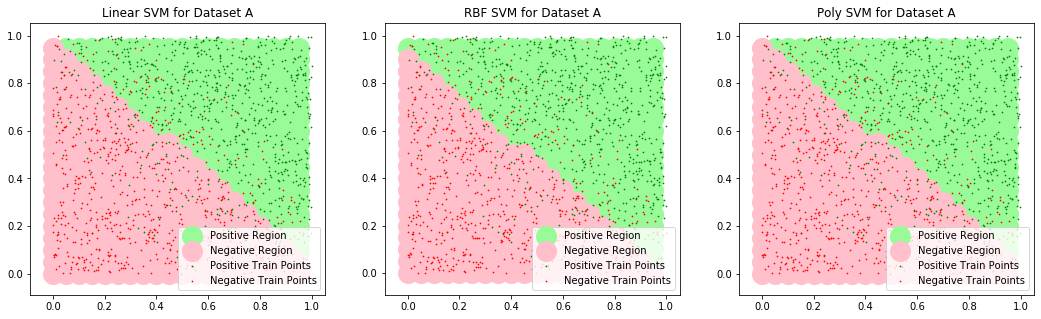

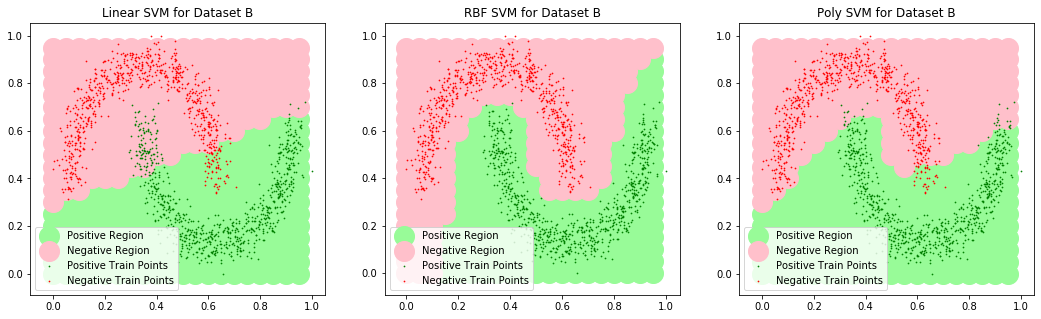

In [6]:
# Codewrite cell: 
# Generate plots of learned classifier for all three kernel types, on dataA and dataB.
# Plots should give both the learned classifier and the train data. 
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 3 * 2 = 6

# Dataset A

X1_decision_A, X2_decision_A = np.meshgrid(np.arange(np.min(X_trainA[:,0]), np.max(X_trainA[:,0]), 0.05), np.arange(np.min(X_trainA[:,1]), np.max(X_trainA[:,1]), 0.05))
X_decision_A = np.c_[np.ravel(X1_decision_A), np.ravel(X2_decision_A)]
Y_decision_AA = lin_classifierA.predict(X_decision_A)

fig, axes = plt.subplots(1, 3, figsize = (18,5))
axes[0].scatter(X_decision_A[Y_decision_AA == 1][:,0], X_decision_A[Y_decision_AA == 1][:,1], color = 'palegreen', s = 400)
axes[0].scatter(X_decision_A[Y_decision_AA == -1][:,0], X_decision_A[Y_decision_AA == -1][:,1], color = 'pink', s = 400)
axes[0].scatter(X_trainA[Y_trainA == 1][:,0], X_trainA[Y_trainA == 1][:,1], color = 'green', s=0.5)
axes[0].scatter(X_trainA[Y_trainA == -1][:,0], X_trainA[Y_trainA == -1][:,1], color = 'red', s = 0.5)
axes[0].legend(['Positive Region', 'Negative Region', 'Positive Train Points', 'Negative Train Points'])
axes[0].title.set_text(r'Linear SVM for Dataset A')

Y_decision_AB = rbf_classifierA.predict(X_decision_A)
axes[1].scatter(X_decision_A[Y_decision_AB == 1][:,0], X_decision_A[Y_decision_AB == 1][:,1], color = 'palegreen', s = 400)
axes[1].scatter(X_decision_A[Y_decision_AB == -1][:,0], X_decision_A[Y_decision_AB == -1][:,1], color = 'pink', s = 400)
axes[1].scatter(X_trainA[Y_trainA == 1][:,0], X_trainA[Y_trainA == 1][:,1], color = 'green', s=0.5)
axes[1].scatter(X_trainA[Y_trainA == -1][:,0], X_trainA[Y_trainA == -1][:,1], color = 'red', s = 0.5)
axes[1].legend(['Positive Region', 'Negative Region', 'Positive Train Points', 'Negative Train Points'])
axes[1].title.set_text(r'RBF SVM for Dataset A')

Y_decision_AC = poly_classifierA.predict(X_decision_A)
axes[2].scatter(X_decision_A[Y_decision_AC == 1][:,0], X_decision_A[Y_decision_AC == 1][:,1], color = 'palegreen', s = 400)
axes[2].scatter(X_decision_A[Y_decision_AC == -1][:,0], X_decision_A[Y_decision_AC == -1][:,1], color = 'pink', s = 400)
axes[2].scatter(X_trainA[Y_trainA == 1][:,0], X_trainA[Y_trainA == 1][:,1], color = 'green', s=0.5)
axes[2].scatter(X_trainA[Y_trainA == -1][:,0], X_trainA[Y_trainA == -1][:,1], color = 'red', s = 0.5)
axes[2].legend(['Positive Region', 'Negative Region', 'Positive Train Points', 'Negative Train Points'])
axes[2].title.set_text(r'Poly SVM for Dataset A')
plt.savefig('fig1.png')
plt.show()

# Dataset B

X1_decision_B, X2_decision_B = np.meshgrid(np.arange(np.min(X_trainB[:,0]), np.max(X_trainB[:,0]), 0.05), np.arange(np.min(X_trainB[:,1]), np.max(X_trainB[:,1]), 0.05))
X_decision_B = np.c_[np.ravel(X1_decision_B), np.ravel(X2_decision_B)]
Y_decision_BA = lin_classifierB.predict(X_decision_B)

fig, axes = plt.subplots(1, 3, figsize = (18,5))
axes[0].scatter(X_decision_B[Y_decision_BA == 1][:,0], X_decision_B[Y_decision_BA == 1][:,1], color = 'palegreen', s = 400)
axes[0].scatter(X_decision_B[Y_decision_BA == -1][:,0], X_decision_B[Y_decision_BA == -1][:,1], color = 'pink', s = 400)
axes[0].scatter(X_trainB[Y_trainB == 1][:,0], X_trainB[Y_trainB == 1][:,1], color = 'green', s=0.5)
axes[0].scatter(X_trainB[Y_trainB == -1][:,0], X_trainB[Y_trainB == -1][:,1], color = 'red', s = 0.5)
axes[0].legend(['Positive Region', 'Negative Region', 'Positive Train Points', 'Negative Train Points'])
axes[0].title.set_text(r'Linear SVM for Dataset B')

Y_decision_BB = rbf_classifierB.predict(X_decision_B)
axes[1].scatter(X_decision_B[Y_decision_BB == 1][:,0], X_decision_B[Y_decision_BB == 1][:,1], color = 'palegreen', s = 400)
axes[1].scatter(X_decision_B[Y_decision_BB == -1][:,0], X_decision_B[Y_decision_BB == -1][:,1], color = 'pink', s = 400)
axes[1].scatter(X_trainB[Y_trainB == 1][:,0], X_trainB[Y_trainB == 1][:,1], color = 'green', s=0.5)
axes[1].scatter(X_trainB[Y_trainB == -1][:,0], X_trainB[Y_trainB == -1][:,1], color = 'red', s = 0.5)
axes[1].legend(['Positive Region', 'Negative Region', 'Positive Train Points', 'Negative Train Points'])
axes[1].title.set_text(r'RBF SVM for Dataset B')

Y_decision_BC = poly_classifierB.predict(X_decision_B)
axes[2].scatter(X_decision_B[Y_decision_BC == 1][:,0], X_decision_B[Y_decision_BC == 1][:,1], color = 'palegreen', s = 400)
axes[2].scatter(X_decision_B[Y_decision_BC == -1][:,0], X_decision_B[Y_decision_BC == -1][:,1], color = 'pink', s = 400)
axes[2].scatter(X_trainB[Y_trainB == 1][:,0], X_trainB[Y_trainB == 1][:,1], color = 'green', s=0.5)
axes[2].scatter(X_trainB[Y_trainB == -1][:,0], X_trainB[Y_trainB == -1][:,1], color = 'red', s = 0.5)
axes[2].legend(['Positive Region', 'Negative Region', 'Positive Train Points', 'Negative Train Points'])
axes[2].title.set_text(r'Poly SVM for Dataset B')
plt.savefig('fig2.png')
plt.show()

# SVM in Higher Dimension

Similar as previous part, write code for choosing best hyperparameters for each kernel type. You may use sklearn.svm for this purpose. (use a part of training set as validation set)


Since this data is in Higher dimension, you can not illustrate the learned classifier. 
So for each classification data set, report the best kernel and regularisation parameters for linear, RBF and Poly kernels. Report the training and test zero-one error for those hyperparameters.



In [7]:
## MAKE YOUR DIRECTORY STRUCTURE TO CONTAIN DATA FOLDER IN THE FOLLOWING WAY.

dataC = np.load("../../Data/data3.npz")
print (dataC.files)

## Training data = arr1, arr2 
## Test data = arr3, arr4


['arr1', 'arr2', 'arr3', 'arr4']


In [ ]:
# CodeWrite cell
# Write SVM classifier using SKlearn
# write only functions here

In [8]:
# CodeWrite cell
# Write code here for doing validation (for kernel_param and regularisation_param)
# on a subset of the training set. 
# Also for generating the numbers that you report below.
X_trainC = dataC['arr1']
Y_trainC = dataC['arr2']
X_testC = dataC['arr3']
Y_testC = dataC['arr4']
from sklearn.preprocessing import MinMaxScaler
scalerC = MinMaxScaler()
X_trainC = scalerC.fit_transform(X_trainC)
X_testC = scalerC.transform(X_testC)

# Best Hyperparameters for Linear Kernel
linear_classifierC = hyperparam_tune(X_trainC, Y_trainC, 'linear')
print('Best Linear Parameters for Data C')
print(linear_classifierC.best_params_)

# Best Hyperparameters for RBF Kernel
rbf_classifierC = hyperparam_tune(X_trainC, Y_trainC, 'rbf')
print('Best RBF Parameters for Data C')
print(rbf_classifierC.best_params_)

# Best Hyperparameters for Poly Kernel
poly_classifierC = hyperparam_tune(X_trainC, Y_trainC, 'poly')
print('Best Poly Parameters for Data C')
print(poly_classifierC.best_params_)

Best Linear Parameters for Data C
{'C': 100}
Best RBF Parameters for Data C
{'C': 10, 'gamma': 0.1}
Best Poly Parameters for Data C
{'C': 1, 'degree': 2, 'gamma': 10}


In [9]:
# Validation and test for Linear Classifier for A

lin_classifierC = SVM_func(X_trainC, Y_trainC, 'linear', 100)
Y_train_pred_linC = lin_classifierC.predict(X_trainC)
print(f'Train error is {1-np.sum(Y_train_pred_linC==Y_trainC)/(len(Y_trainC))}')
Y_test_pred_linC = lin_classifierC.predict(X_testC)
print(f'Test error is {1-np.sum(Y_test_pred_linC==Y_testC)/(len(Y_testC))}')

# Validation and test for rbf Classifier for A

rbf_classifierC = SVM_func(X_trainC, Y_trainC, 'rbf', 10, gamma = 0.01)
Y_train_pred_rbfC = rbf_classifierC.predict(X_trainC)
print(f'Train error is {1-np.sum(Y_train_pred_rbfC==Y_trainC)/(len(Y_trainC))}')
Y_test_pred_rbfC = rbf_classifierC.predict(X_testC)
print(f'Test error is {1-np.sum(Y_test_pred_rbfC==Y_testC)/(len(Y_testC))}')

# Validation and test for poly Classifier for A

poly_classifierC = SVM_func(X_trainC, Y_trainC, 'poly', 1, degree = 2, gamma = 10)
Y_train_pred_polyC = poly_classifierC.predict(X_trainC)
print(f'Train error is {1-np.sum(Y_train_pred_polyC==Y_trainC)/(len(Y_trainC))}')
Y_test_pred_polyC = poly_classifierC.predict(X_testC)
print(f'Test error is {1-np.sum(Y_test_pred_polyC==Y_testC)/(len(Y_testC))}')


Train error is 0.07258064516129037
Test error is 0.1027210884353742
Train error is 0.12354838709677418
Test error is 0.15714285714285714
Train error is 0.04677419354838708
Test error is 0.08571428571428574


TextWrite Cell: Give your observations and the list of hyperparameter choices and train zero-one error and test zero-one error for all three kernel choices, for all datasets.

| Dataset | Kernel | Optimal Hyperparameters        | Train Error | Test Error |
|---------|--------|--------------------------------|-------------|------------|
| A       | Linear | C = 10                         | 0.176       | 0.21       |
| A       | RBF    | C = 1, gamma = 0.01            | 0.172       | 0.18       |
| A       | Poly   | C = 1, degree = 1, gamma = 10  | 0.176       | 0.21       |
| B       | Linear | C = 10                         | 0.129       | 0.132      |
| B       | RBF    | C = 10, gamma = 10             | 0           | 0.002      |
| B       | Poly   | C = 10, degree = 3, gamma = 10 | 0.043       | 0.056      |
| C       | Linear | C = 100                        | 0.073       | 0.103      |
| C       | RBF    | C = 10, gamma = 0.1            | 0.124       | 0.157      |
| C       | Poly   | C = 1, degree = 2, gamma = 10  | 0.047       | 0.085      |

### Observations
* Dataset A inherently has a Linear Decision Boundary and hence the classifier with linear kernel performs similarly to the other two kernels. While both RBF and Polynomial Kernels can learn non-linear decision boundaries, it is not possible to compare their performance on dataset A which has a linear decision boundary.

* By looking at the plots of dataset B, it is easy to notice that the decision boundary is non-linear in nature (two crescent moons) and the two classes are nearly seperable.

* As expected, the linear kernel performs very poorly on dataset B because it is inherently non-linear. It is interesting to note the difference in performance of RBF and Polynomial kernels. It is seen that RBF Kernel outperforms the Polynomial Kernel. This can be explained as follows. The RBF Kernel is essentially the exponential of a square. If we consider the polynomial expansion for the exponential function, there are essentially infinite number of terms which makes it infinite dimensional. Whereas, the Polynomial Kernel, for a particular degree has only a fixed number of terms, reducing its flexibility.

* For the case of dataset C, we notice that the optimal degree of the polynomial kernel is 2 and the polynomial kernel performs better than the other kernels, this indicates that the decision boundary for dataset C is quadratic in nature.